## Feature selection done by testing unsupervised and supervised methods
Feature selection is done after explorative data analysis. 
If potential groups of damage-influencing variables are clear than supervised techniques will be used, if underlying groups of variables are unknown than PCA (unsupervised method) is applied on the survey data to reduce mulitcollinearity.



In [93]:
import numpy as np
import pandas as pd

import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer



ModuleNotFoundError: No module named 'factor_analyzer'

In [75]:
df_candidates = pd.read_excel("../input_survey_data/survey_data_candidates.xlsx")
df_candidates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Target_direct_s                     247 non-null    float64
 1   Target_direct_r                     246 non-null    float64
 2   shp_closed_d                        252 non-null    int64  
 3   shp_duration_back2normal            252 non-null    int64  
 4   business_reduction_s                252 non-null    int64  
 5   business_reduction_r                251 non-null    float64
 6   inundation_duration_h               252 non-null    int64  
 7   water_depth_cm                      252 non-null    int64  
 8   contaminations                      252 non-null    int64  
 9   warning_time_h                      252 non-null    int64  
 10  emergency_measures                  252 non-null    int64  
 11  protect_valuables_impl              252 non-n

In [82]:
## clean df from few nan values

print(df_candidates.isna().sum())
df_candidates = df_candidates.replace(np.nan, 0)


Target_direct_s                       0
Target_direct_r                       0
shp_closed_d                          0
shp_duration_back2normal              0
business_reduction_s                  0
business_reduction_r                  0
inundation_duration_h                 0
water_depth_cm                        0
contaminations                        0
warning_time_h                        0
emergency_measures                    0
protect_valuables_impl                0
water_barries_impl                    0
flood_protections_impl                0
resistant_material_building_impl      0
elevation_building_height_cm          0
building_elevation_rel2surrounding    0
building_floor                        0
shp_damage_level_business             0
shp_damage_level_products             0
shp_sector                            0
shp_employees                         0
shp_avgmonthly_sale_mVND              0
shp_capital_mVND                      0
shp_risk_behaviour                    0


## define explanatory variables and Standardize

In [83]:
## select only numeric columns, exclude als .specfic-columns or with string or datetime
#df_t = df_candidates.select_dtypes(include = ['int64'], exclude=["object"])  

## define set for target and explanatory variables
df_candidates_X = df_candidates[df_candidates.columns.drop(list(df_candidates.filter(regex='^Target')))]  # only explanatory vars
df_candidates_Y = df_candidates[list(df_candidates.filter(regex='^Target'))]  # target var for direct cost due to damages on business contents 


X = StandardScaler().fit_transform(df_candidates_X) # standarize the variables
print(X.shape, X)

#df['Attrition_Flag'].replace('Existing Customer','1',inplace=True)  # categorize string columns
#df['Attrition_Flag'].replace('Attrited Customer','0',inplace=True)


(252, 24) [[-0.19788526 -0.25679631  0.06399057 ... -0.05697625 -0.33599224
  -0.30608811]
 [ 0.09520424  0.93863479  0.06399057 ...  2.32248772 -0.21549407
  -0.11886917]
 [-0.19788526 -0.25679631 -0.8318774  ... -0.1349242  -0.33599224
  -0.21247864]
 ...
 [ 1.05821261  1.1378733   2.15434916 ... -0.12671915 -0.33599224
  -0.30608811]
 [-0.15601533 -0.21694861  2.1244869  ... -0.09800149 -0.33599224
  -0.30608811]
 [-0.19788526 -0.25679631  2.1244869  ... -0.13902673 -0.21549407
  -0.16567391]]


## PCA

*Example from: https://towardsdatascience.com/principal-component-analysis-with-python-an-example-for-beginners-by-a-beginner-ac052eff45c*


#### PCA on direct costs

In [84]:

## We will start by using only the first 2 leading principal components, and then explore 3 principal components and 4 principal components.
pca = PCA(n_components=3)
PC = pca.fit_transform(X)
principalDF = pd.DataFrame(data=PC, columns=['pc1','pc2', 'pc3'])
df_pca = pd.concat([principalDF, df_candidates[['Target_direct_s']]], axis = 1)
df_pca.head()
#X.columns.tolist()
#components #=components[9:21]


,pc1,pc2,pc3,Target_direct_s
0,0.140089,-1.061167,-0.607122,30.0
1,3.548939,0.547703,-1.322628,97.0
2,-0.638547,0.127566,-1.395237,0.0
3,29.305635,2.081818,-3.756280,6000.0
4,0.613495,-1.162003,1.520319,15.0


#### Loadings

In [85]:
PC_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components = df_candidates_X.columns.tolist()  # use X before standarized

loadingdf = pd.DataFrame(PC_loadings, columns=('PC1','PC2', 'PC3'))
loadingdf["variable"] = components
loadingdf


,PC1,PC2,PC3,variable
0,0.944157,0.007253,-0.107816,shp_closed_d
1,0.947559,-0.020800,-0.090928,shp_duration_back2normal
2,0.376501,-0.490241,0.678739,business_reduction_s
3,0.365683,-0.453246,0.619360,business_reduction_r
4,0.178530,0.101497,0.028340,inundation_duration_h
5,0.251572,-0.165288,-0.171194,water_depth_cm
6,0.053524,-0.353224,-0.297319,contaminations
7,-0.085735,-0.275122,0.040341,warning_time_h
8,-0.012096,-0.454766,-0.013289,emergency_measures
9,0.063528,0.401980,-0.191404,protect_valuables_impl


In [86]:
### Visualization of important variables by weights of PCs
fig = ex.scatter(x=loadingdf['PC1'],y=loadingdf['PC2'],text=loadingdf['variable'],)

fig.update_layout(
height = 600, width = 500,
title_text='loadings plot')
fig.update_traces(textposition='bottom center')
fig.add_shape(type="line",
    x0 = -0, y0 = -0.5, x1 = -0, y1 = 2.5,
    line = dict(color="RoyalBlue",width=3)
)
fig.add_shape(type="line",
    x0 = -1, y0 = 0, x1 = 1, y1 = 0,
    line=dict(color="RoyalBlue",width=3)
)
fig.show()

#### Eigenvectors and eigenvalues
Code snippets were taken from: https://www.kaggle.com/code/gianinamariapetrascu/pca-varimax-rotation#var

In [87]:
## calc Eingevactor and eigenvalues

eigenvalues, eigenvectors = np.linalg.eig(np.corrcoef(X.T))

# sort the eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]

# convert to dataframes
eigenvalues_df = pd.DataFrame({'Eigenvalue': eigenvalues}, index=df_candidates_X.columns)
eigenvalues_df['Proportion'] = eigenvalues_df['Eigenvalue'] / eigenvalues_df['Eigenvalue'].sum()
eigenvalues_df['Cumulative Proportion'] = eigenvalues_df['Proportion'].cumsum()

display(eigenvalues_df.style.format({'Eigenvalue': '{:.4f}', 'Proportion': '{:.4f}', 'Cumulative Proportion': '{:.4f}'}))

,Eigenvalue,Proportion,Cumulative Proportion
shp_closed_d,4.1805,0.1742,0.1742
shp_duration_back2normal,2.2226,0.0926,0.2668
business_reduction_s,1.7174,0.0716,0.3384
business_reduction_r,1.5708,0.0654,0.4038
inundation_duration_h,1.4335,0.0597,0.4635
water_depth_cm,1.3699,0.0571,0.5206
contaminations,1.2065,0.0503,0.5709
warning_time_h,1.1546,0.0481,0.6190
emergency_measures,1.0495,0.0437,0.6627
protect_valuables_impl,0.9660,0.0403,0.7030


#### Summarize eigenvalues:
- around 33.8% of the variance in the direct damage costs for business contents can be explained by flood variables (water depth, inundation time and contamination)


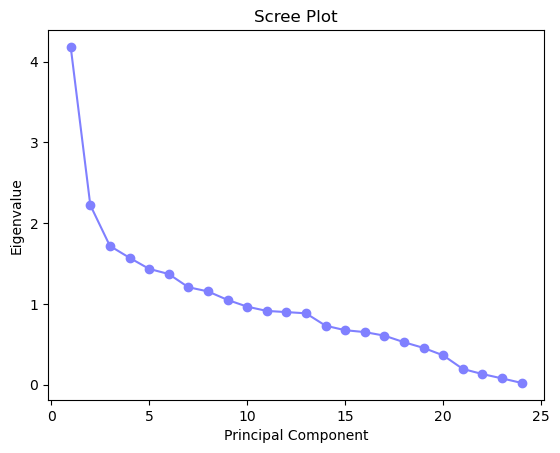

In [88]:
## how many PCs are needed  ? 
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', color='#8080ff')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

In [90]:
pca.components_.T;

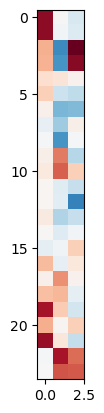

In [91]:
components = pca.components_.T

vmax = np.abs(components).max()
plt.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)

In [92]:
pca.explained_variance_ratio_



array([0.17418822, 0.09260905, 0.07155936])

### Varimax rotation for better interpretation of variables
By the rotation or adjustment the variance shared among the variables should be maximized

In [ ]:
# normalizing features
#X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

# fit factor analyzer with principal components and varimax rotation
fa = FactorAnalyzer(rotation="varimax", n_factors=2, method='principal')
fa.fit(X_norm)

# get the rotated factor pattern
loadings2 = pd.DataFrame(fa.loadings_, index=X_norm.columns, columns=[f"Factor{i+1}" for i in range(2)])
rotated_factor_pattern = loadings2[abs(loadings2) >= 0.4].dropna(how='all')


<Axes: >

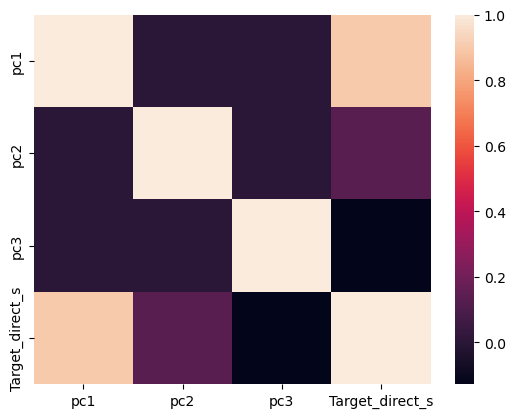

In [27]:
#Checking Co-relation between features after PCA
sns.heatmap(df_pca.corr())

#### PCA on indirect costs